<div style='float:left'>
<img style="-webkit-user-select: none" src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/marca_UOC_web.jpg">
<h1>
Práctica sobre:<br> Algoritmos de clasificación predictiva
</h1>
</div>
<div style='float:right'>
<table align="right">
<tr>
<th></th>
<th>Master UOC en Inteligencia de Negocio</th>
  </tr>
  <tr>
   <td>Asignatura</td>
    <td>B2.332 Modelos Avanzados</td>
  </tr>
  <tr>
    <td>Consultor</td>
    <td>Jordi Gironés</td>
  </tr>
   <tr>
    <td>Estudiante</td>
    <td>Nombre estudiante</td>
  </tr>
   <tr>
    <td>Fecha</td>
    <td>19/10/2016</td>
  </tr>
</table>
</div>
<div style='clear:both'></div>



## Introducción

El juego de datos a trabajar es libre, sin embargo para orientar mejor en la práctica proponemos el siguiente:
[Machine Learning Repository: Incendios forestales](https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/).

Deberáis utilizar código R y los paquetes `kernlab` y/o `e1071`.

Se trata de un juego de datos en formato csv que recoje medidas ambientales de distintas zonas forestales con el objetivo de predecir el riesgo de incendio.

A nivel de resumen en la práctica llevaremos a cabo las siguientes tareas:
   

#### Entregable
La práctica a entregar por parte del estudiante será este mismo documento con el siguiente índice ampliamente desarrollado:

    1.  Carga de datos y tareas de preprocesado
    2.  Optimización de los parámetros gamma y coste
    3.  Aplicación del algoritmo SVM radial, polinomial y sigmoidal
    4.  Aplicación del algoritmo Redes Neuronales
    5.  Conclusiones
    6.  Fuentes consultadas

Deberá quedar explícito que se ha trabajado y entendido el material didáctico y que soys capaces de realizar tareas de laboratorio de analítica de datos con los algoritmos estudiados.

********************************************************
### 1. Carga de datos y tareas de preprocesado
********************************************************

Empezamos por cargar nuestro juego de datos

In [67]:
# Descargamos el juego de datos en un directorio local.
Fires <- read.csv(file="B2.332-20161-SVM.csv",header = TRUE, sep = ",", quote = "\"", dec = ".")

Fires[,5] <- scale(as.numeric(Fires[,5]))
Fires[,6] <- scale(as.numeric(Fires[,6]))
Fires[,7] <- scale(as.numeric(Fires[,7]))
Fires[,8] <- scale(as.numeric(Fires[,8]))
Fires[,9] <- scale(as.numeric(Fires[,9]))
Fires[,10] <- scale(as.numeric(Fires[,10]))
Fires[,11] <- scale(as.numeric(Fires[,11]))
Fires[,12] <- scale(as.numeric(Fires[,12]))
Fires[,13] <- as.numeric(Fires[,13])

# Visualizamos la estructura del juego de datos
summary(Fires)


       X                  Y                month      day    
 Min.   :1.000000   Min.   :2.000000   aug    :184   fri:85  
 1st Qu.:3.000000   1st Qu.:4.000000   sep    :172   mon:74  
 Median :4.000000   Median :4.000000   mar    : 54   sat:84  
 Mean   :4.669246   Mean   :4.299807   jul    : 32   sun:95  
 3rd Qu.:7.000000   3rd Qu.:5.000000   feb    : 20   thu:61  
 Max.   :9.000000   Max.   :9.000000   jun    : 17   tue:64  
                                       (Other): 38   wed:54  
         FFMC.V1                 DMC.V1                   DC.V1         
 Min.   :-13.033194952   Min.   :-1.7139480042   Min.   :-2.1769997555  
 1st Qu.: -0.080556508   1st Qu.:-0.6600259521   1st Qu.:-0.4443976744  
 Median :  0.173061588   Median :-0.0401636489   Median : 0.4686650789  
 Mean   :  0.000000000   Mean   : 0.0000000000   Mean   : 0.0000000000  
 3rd Qu.:  0.408564105   3rd Qu.: 0.4922621582   3rd Qu.: 0.6690148310  
 Max.   :  1.006378187   Max.   : 2.8171361367   Max.   : 1.260389

In [68]:
head(Fires)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
1,7,5,mar,fri,-0.805179637287312,-1.32204513740515,-1.82870561911413,-0.860112528747163,-1.84085723376575,0.411325968567543,1.49716437840361,-0.0731974161662176,0
2,7,4,oct,tue,-0.00809419453472182,-1.17839946512302,0.488417871383908,-0.509195101482229,-0.153129955008254,-0.691786268749331,-1.74007033826863,-0.0731974161662176,0
3,7,4,oct,sat,-0.00809419453472182,-1.04880608686848,0.560172913365231,-0.509195101482229,-0.73866799049555,-0.691786268749331,-1.51681277160158,-0.0731974161662176,0
4,8,6,mar,fri,0.191177166153428,-1.21118815118742,-1.89642947896167,-0.00475129978888691,-1.82363552683966,3.230390575044,-0.0098241965989853,0.602571586654042,0
5,8,6,mar,sun,-0.243596711711624,-0.930142270635411,-1.79685928025725,0.126842735435463,-1.28976261213065,3.35295860141254,-1.23774081326777,-0.0731974161662176,0
6,8,6,aug,sun,0.299870635619689,-0.399277829592736,-0.241629213044058,1.24539203484244,0.570181735887817,-0.936922321486415,0.771577286735693,-0.0731974161662176,0


###### Categorización de la variable objetivo
Nuestra variable objetivo será 'area' que se corresponde con el número de hectáreas quemadas bajo las condiciones ambientales especificadas en su entrada correspondiente.

El variable area es continua y puesto que queremos realizar tareas de clasificación y no de regresión, deberemos categorizarla.

Fruto de la categorización podemos optar por trabajar con solo dos grupos (incendio, no incendio) o trabajar con varios grupos (rangos de hectareas quemadas)

In [69]:
Fires2 <- Fires
x <- Fires2[,1:12]

# Opción 1: 
# 0 = No incendio ; 1 = Incendio
Fires2[!Fires2[,13]==0,]$area <- 1

# Opción 2: 
# Considerar 3 rangos por ejemplo: (-1,0] , (0,15] , (15,10000]
# y <- cut(Fires[,13], breaks = as.numeric(c(-1,0,15,10000)))

z <- factor(Fires2[,13])

In [70]:
# Cargamos en memoria la librería R a utilizar: e1071 o kernlab
if(!require(e1071)){
    install.packages('e1071', repos='http://cran.es.r-project.org')
    require(e1071)
}

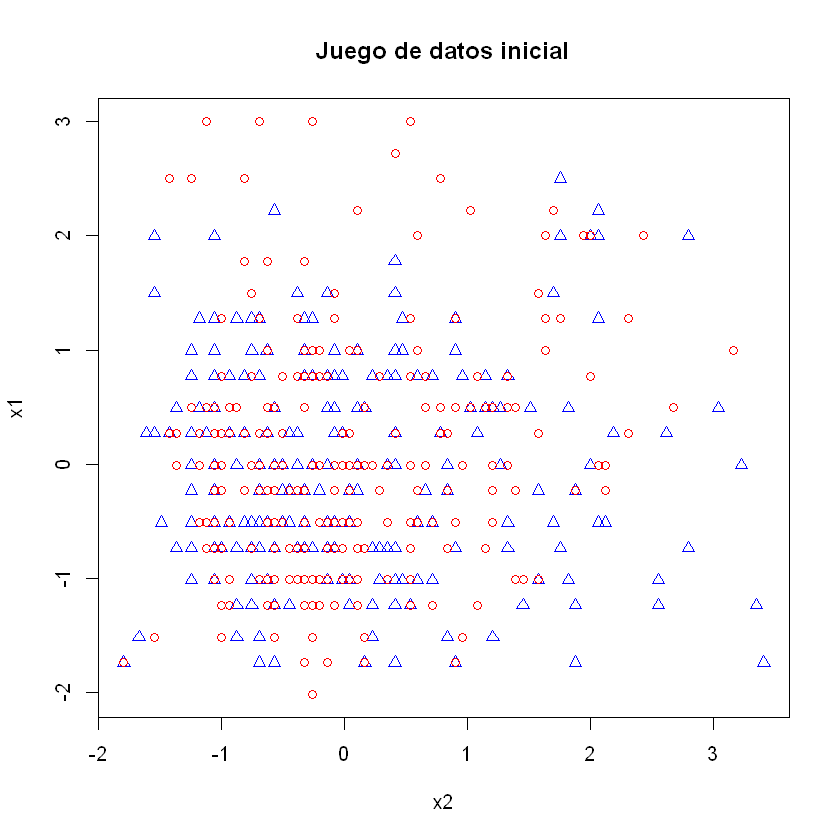

In [71]:
# Visualizamos nuestro juego de datos
plot(c(min(x[,10]), max(x[,10])),c(min(x[,11]), max(x[,11])),type='n',xlab='x2',ylab='x1')
title(main='Juego de datos inicial')
points(x[z=="0",10], x[z=="0",11], pch = 2, col="blue")
points(x[z=="1",10], x[z=="1",11], pch = 1, col="red")

###### Separar datos de entrenamiento y datos de prueba

In [72]:
set.seed(1)
#Separamos los datos de las etiquetas
labels <- z
data <- x

# Utilizaremos 2/3 de los datos para entrenamiento
N=dim(data)[1]
all=seq(1,N)
id.train=sort(sample(N,N*2/3));
id.test=setdiff(all,id.train);

# Generamos el conjunto de entrenamiento:
train <- data[id.train,]
labelsTrain <- labels[id.train]
#nrow(train)

# Generamos el conjunto de test:
test <- data[id.test,]
labelsTest <- labels[id.test]
#nrow(test)

# Preparamos los datos de entrenamiento
trainFact=data.frame(train,z=as.factor(labelsTrain))

********************************************************
### 2. Optimización de los parámetros gamma y coste
********************************************************

In [82]:
#tuned <- tune.svm(y~., data = trainFact, gamma = 10^(-6:-1), cost = 10^(-1:2))
#    summary(tuned)

********************************************************
### 3. Aplicación del algoritmo SVM radial, polinomial y sigmoidal
********************************************************

In [74]:
# Generamos el modelo de clasificacion SVM polinomial de grado 3
svm.modelo=svm(z~.,data=trainFact,kernel="polynomial", degree=3, coef0=5 ,cross=5)

# Aplicamos el modelo sobre los datos test
pred1 <- predict(svm.modelo, test)

# Generamos una matriz de confusion para medir el
# grado de acierto de la prediccion
t1 <- table(pred = pred1, real = labelsTest)
t1

    real
pred  0  1
   0 41 27
   1 44 61

In [75]:
round(100 * sum(diag(t1)) / sum(t1), digits = 2)

[1] 58.96

In [76]:
# Resultado del modelo
summary(svm.modelo)


Call:
svm(formula = z ~ ., data = trainFact, kernel = "polynomial", degree = 3, 
    coef0 = 5, cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
      gamma:  0.03571428571 
     coef.0:  5 

Number of Support Vectors:  284

 ( 137 147 )


Number of Classes:  2 

Levels: 
 0 1

5-fold cross-validation on training data:

Total Accuracy: 57.84883721 
Single Accuracies:
 55.88235294 62.31884058 60.86956522 59.42028986 50.72463768 




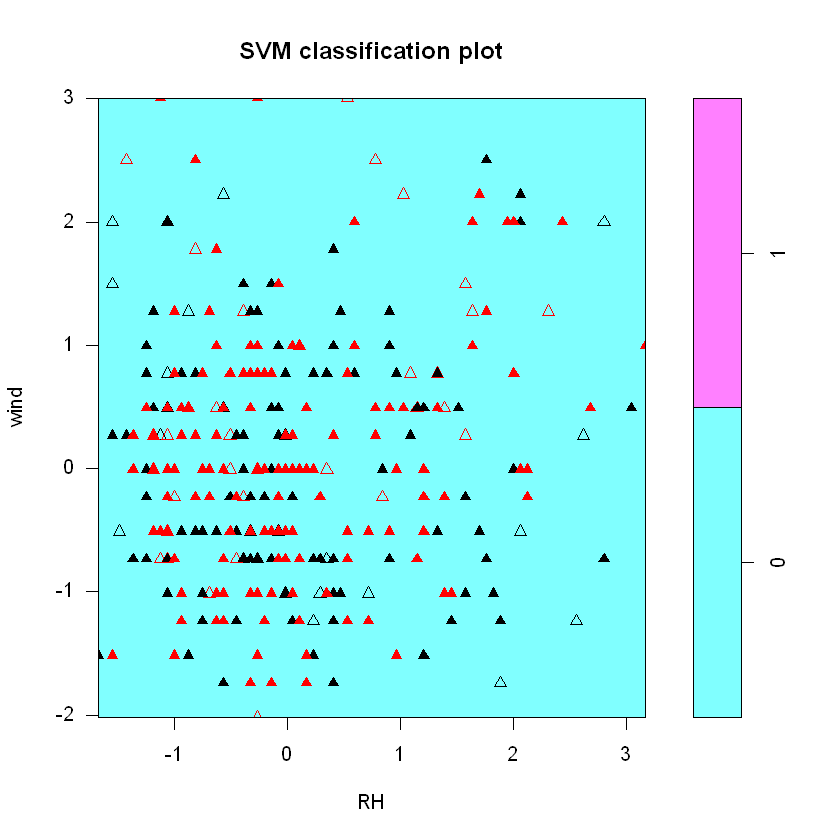

In [77]:
# Visualizamos el modelo generado
plot(svm.modelo, trainFact, wind~RH, svSymbol = 17, dataSymbol = 2)

********************************************************
### 4. Aplicación del algoritmo redes neuronales
********************************************************

In [78]:
# Cargamos en memoria la librería R a utilizar: neuralnet
if(!require(neuralnet)){
    install.packages('neuralnet', repos='http://cran.es.r-project.org')
    require(neuralnet)
}

In [79]:
#Separamos los datos de las etiquetas
area <- z
data <- cbind(x,area)

# Utilizaremos 2/3 de los datos para entrenamiento
N=dim(data)[1]
all=seq(1,N)
set.seed(10)
id.train=sort(sample(N,N*2/3));
id.test=setdiff(all,id.train);

# Generamos el conjunto de entrenamiento:
trainingdata <- data[id.train,5:13]
colnames(trainingdata) <- c("Input1","Input2","Input3","Input4","Input5","Input6","Input7","Input8","Output") 
trainingdata2 <- trainingdata
trainingdata2 <- apply(trainingdata2, 2, as.numeric)

#Test the neural network on some training data
testdata <- data[id.test,5:12]
colnames(testdata) <- c("Input1","Input2","Input3","Input4","Input5","Input6","Input7","Input8") 
testdata2 <- testdata
testdata2 <- apply(testdata2, 2, as.numeric)


In [80]:
# --------------------------------
# Modelo con una capa de 2 nodos
# --------------------------------
set.seed(10)
net.radial <- neuralnet(Output~Input1+Input2+Input3+Input4+Input5+Input6+Input7+Input8,data=trainingdata2, 
                        hidden=200, threshold=0.01, algorithm = "rprop+",
                        err.fct = "sse", act.fct = "logistic" , 
                        linear.output = FALSE)

In [91]:
net.radial$result.matrix

,1
error,2.29525102162634
reached.threshold,0.00952172981717768
steps,1254
Intercept.to.1layhid1,0.0914220698466136
Input1.to.1layhid1,-0.514063024270899
Input2.to.1layhid1,-1.16724058994988
Input3.to.1layhid1,-1.07775884616741
Input4.to.1layhid1,0.295165105779201
Input5.to.1layhid1,1.41072742548844
Input6.to.1layhid1,-1.62535174758983


In [81]:
# Prediccion
net.predict <- compute(net.radial, testdata2) 
pred1 <- round(net.predict$net.result)

# Generamos una matriz de confusion para medir el
# grado de acierto de la prediccion
t2 <- table(pred = pred1, real = data[id.test,13])
t2
round(100 * sum(diag(t2)) / sum(t2), digits = 2)

    real
pred  0  1
   0 46 40
   1 36 51

[1] 56.07

********************************************************
### 5. Conclusiones 
********************************************************
    5.1  Conclusiones para Máquinas de Soporte Vectorial
    5.2  Conclusiones para Redes Neuronales
    5.3  Comparativa de los dos algoritmos

********************************************************
### 5. Fuentes consultadas
********************************************************
